# Patches of Vincent van Gogh's Artwork

In [1]:
DATA_DIR = '/home/ldavid/workspace/datasets'
PATCHES_DIR = DATA_DIR + '/vgdb_2016/patches'

IMAGE_SIZE = (300, 300)
PATCHES = 100
SEED = 12038
N_JOBS = 8

DOWNSAMPLING_FACTOR = 4

## Setup

In [2]:
import os
from PIL import Image, ImageFile

import numpy as np
import tensorflow as tf
from skimage import feature

import matplotlib.pyplot as plt
import connoisseur

In [3]:
Image.MAX_IMAGE_PIXELS = None
ImageFile.LOAD_TRUNCATED_IMAGES = True

## Extraction

In [4]:
from keras.preprocessing.image import img_to_array, load_img

image = load_img(DATA_DIR + '/vgdb_2016/train/nvg/nvg_7284207.png')
gray_image = image.convert('L')

gray_tensor = img_to_array(gray_image).squeeze(-1)
canny = feature.canny(gray_tensor,
                      low_threshold=.9,
                      use_quantiles=True).astype(np.float)

In [5]:
def pool_large_image(x, patch_size, pool_size):
    x = x[tf.newaxis, ..., tf.newaxis]
    y = tf.nn.avg_pool2d(x, (1, pool_size, pool_size, 1), strides=pool_size, padding='SAME')
    k = tf.ones([patch_size[0] // pool_size, patch_size[1] // pool_size, 1, 1])
    y = tf.nn.conv2d(y, k, strides=(1, 1, 1, 1), padding="SAME")
    y = y[0, ..., 0]

    y -= tf.reduce_min(y)
    y /= tf.reduce_sum(y)
    return y

x = tf.convert_to_tensor(canny, dtype=tf.float32)
p = pool_large_image(x, (300, 300), 8).numpy()

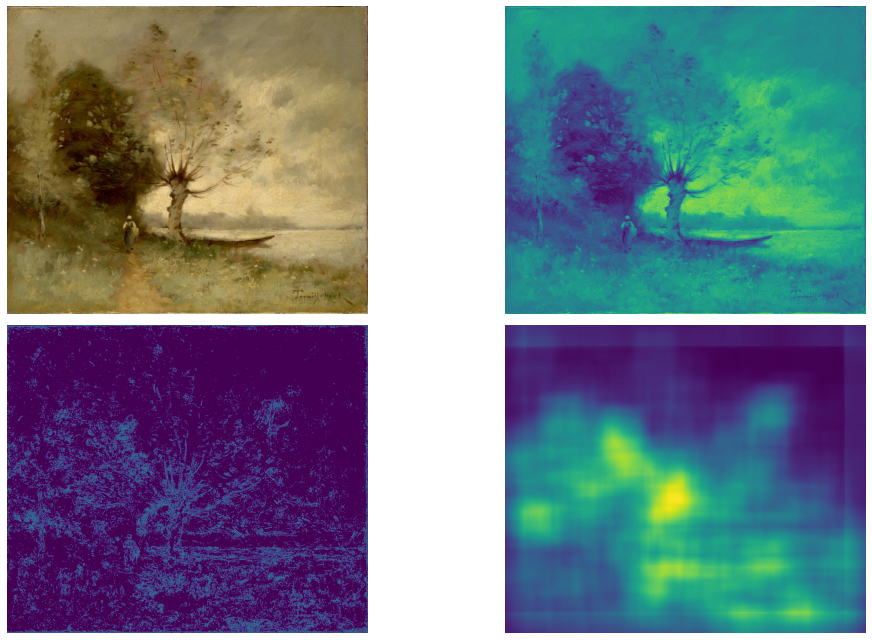

In [6]:
plt.figure(figsize=(16, 9))
plt.subplot(221)
plt.imshow(image)
plt.axis('off')

plt.subplot(222)
plt.imshow(gray_image)
plt.axis('off')

plt.subplot(223)
plt.imshow(canny)
plt.axis('off')

plt.subplot(224)
plt.imshow(p)
plt.axis('off')
plt.tight_layout();

In [7]:
c = np.random.choice(np.arange(np.product(p.shape)), size=(10, 1), p=p.flatten())
c = np.concatenate((c // p.shape[1], c % p.shape[1]), axis=-1).astype(np.int)
c += np.array((300, 300)) // (2 * 8)  # restore sizes before convolution
c *= 8  # restore sizes before max_pooling2d
c -= np.array((300, 300)) // 2  # center selected pixels

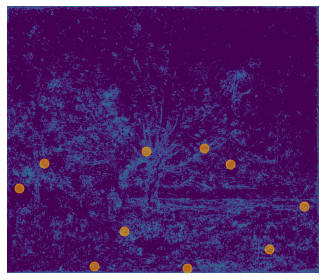

In [8]:
plt.imshow(canny)
plt.scatter(x=c[:, 1], y=c[:, 0], c='orange', s=80, alpha=.6)

plt.axis('off')
plt.tight_layout();

In [9]:
p = 1-p
p /= p.sum()

c = np.random.choice(np.arange(np.product(p.shape)), size=(10, 1), p=p.flatten())
c = np.concatenate((c // p.shape[1], c % p.shape[1]), axis=-1).astype(np.int)
c += np.array((300, 300)) // (2 * 8)  # restore sizes before convolution
c *= 8  # restore sizes before max_pooling2d
c -= np.array((300, 300)) // 2  # center selected pixels

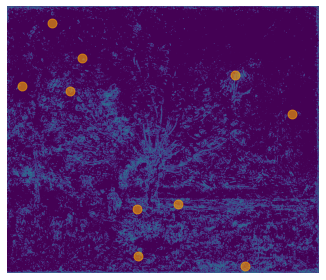

In [10]:
plt.imshow(canny)
plt.scatter(x=c[:, 1], y=c[:, 0], c='orange', s=80, alpha=.6)

plt.axis('off')
plt.tight_layout();

In [11]:
c = np.random.choice(np.arange(np.product(p.shape)), size=(10, 1), p=p.flatten())
c = np.concatenate((c // p.shape[1], c % p.shape[1]), axis=-1).astype(np.int)
c += np.array((300, 300)) // (2 * 8)  # restore sizes before convolution
c *= 8  # restore sizes before max_pooling2d
c -= np.array((300, 300)) // 2  # center selected pixels

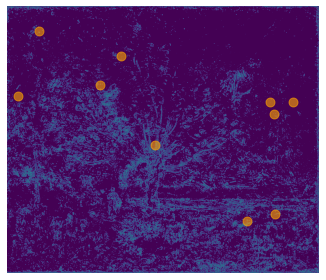

In [12]:
plt.imshow(canny)
plt.scatter(x=c[:, 1], y=c[:, 0], c='orange', s=80, alpha=.6)

plt.axis('off')
plt.tight_layout();